Disadvantages of array based sequence(List as storage):

1. The length of a dynamic array might be longer than the actual number of elements that it stores
2. Amortized bounds for operations may be unacceptable in real-time systems.
3. Insertions and deletions at interior positions of an array are expensive.

Disadvantages of linked list:

1. Elements of a linked list cannot be efficiently accessed by a numeric index k
2. We can not tell the node's position in the list.


## 1. Singly Linked Lists

A collection of nodes collectively form a linear sequence.

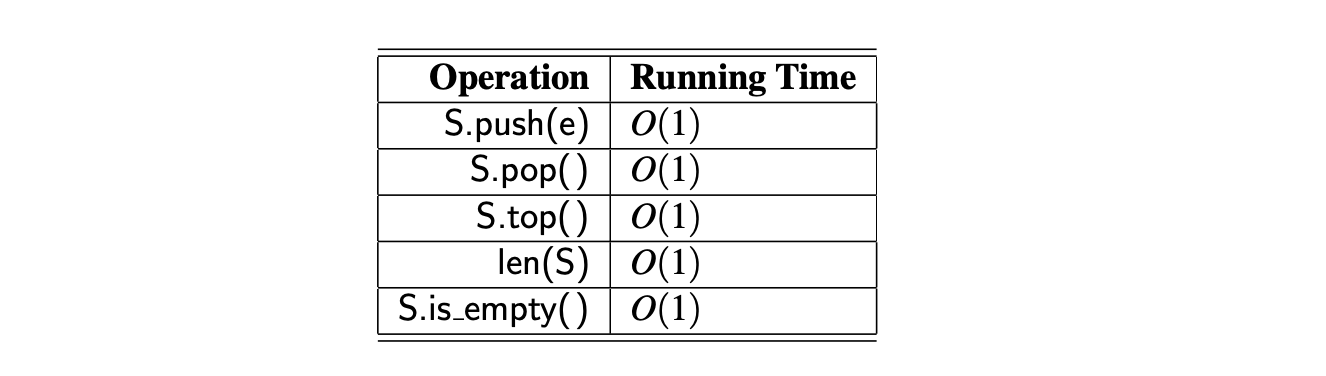

Each node stores 
    - a reference to an object that is an element of the sequence
    - a reference to the next node of the list
    
Traversing:
    - Starting at the head node, moving from one node to another by following each node's next reference, until reach the tail of the list.
    
Collaboration of many objects:

1. Each node is a unique object, storing a reference to its element and a reference to the next node
2. One object represent the linked list as a whole

<font color = 'red'>The linked list instance must keep a reference to the head of the list.</font>

**Delete the last node:**
    - We can not directly reach the node before the tail to delete the next reference.
    - Traversing from the head or using doubly linked list.
    
### 1.1 Implementing a Stack with a Singly Linked List

Orient the top of the stack at the head of linked list:
    - For a singly linked list, we can efficiently insert and delete elemnts in constant time ONLY at the head.
    
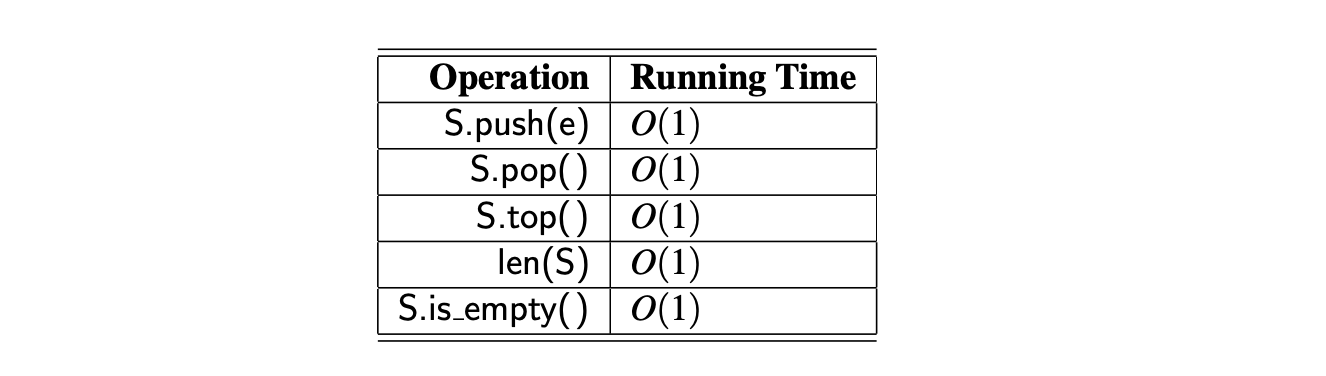

In [1]:
class _Node:
    '''
    Lightweight, nonpublic class for storing a singly linked node
    '''
    # streamline memory usage
    __slots__ = '_element', '_next'
    
    def __init__(self, element, n):
        self._element = element
        self._next = n

In [2]:
class LinkedStack:
    '''
    LIFO Stack Implementation using a singly linked list for storage
    '''
    #-------------------------Nested _Node class--------------------
    class _Node:
        '''
        Lightweight, nonpublic class for storing a singly linked node
        '''
        # streamline memory usage
        __slots__ = '_element', '_next'
    
        def __init__(self, element, n):
            self._element = element
            self._next = n
    
    #-------------------------Stack methods--------------------------
    def __init__(self):
        self._head = None
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def push(self, e):
        self._head = self._Node(e, self._head)
        self._size += 1
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._head._element
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer

### 1.2 Implementing a Queue with a Singly Linked List

Enqueue the queue at the tail and Dequeue the queue at the head.
<br><br>
All operations has worst-case O(1) time, space usage is O(n)

In [3]:
class LinkedQueue:
    '''
    FIFO queue implementation using a singly linked list for storage
    '''
    #-------------------------Nested _Node class--------------------
    class _Node:
        '''
        Lightweight, nonpublic class for storing a singly linked node
        '''
        # streamline memory usage
        __slots__ = '_element', '_next'
    
        def __init__(self, element, n):
            self._element = element
            self._next = n
    
    #-------------------------Queue methods--------------------------
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._head._element
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        if self.is_empty():
            self._tail = None
        return answer
    
    def enqueue(self, e):
        newest = self._Node(e)
        if self.is_empty():
            self._head = newest
        else:
            self._tail._next = newest
        self._tail = newest
        self._size += 1

## 2. Circularly Linked Lists

The tail of the list use its next reference to point back to the head of the list.
    - Provides a more general model for data sets are cyclic.

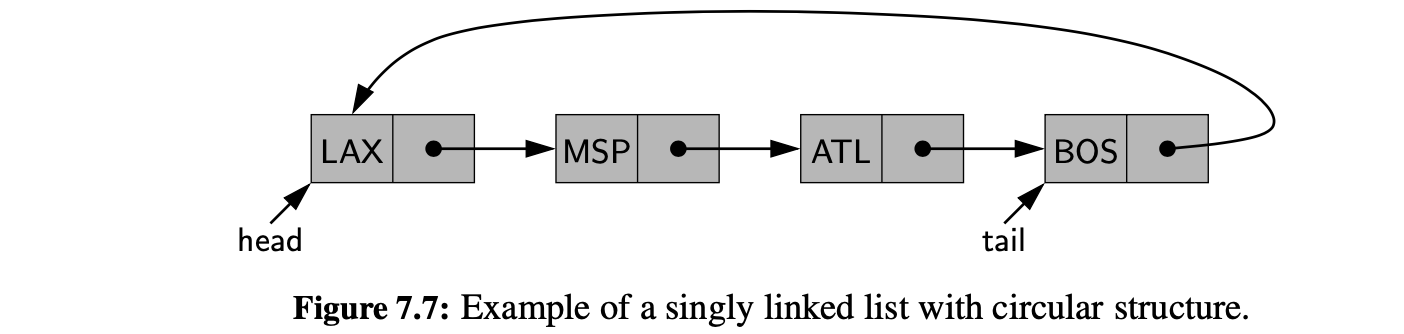

### 2.1 Round-Robin Schedulers

Example:
    - Allocate slices of CPU time to various applications running concurrently on a computer.
    
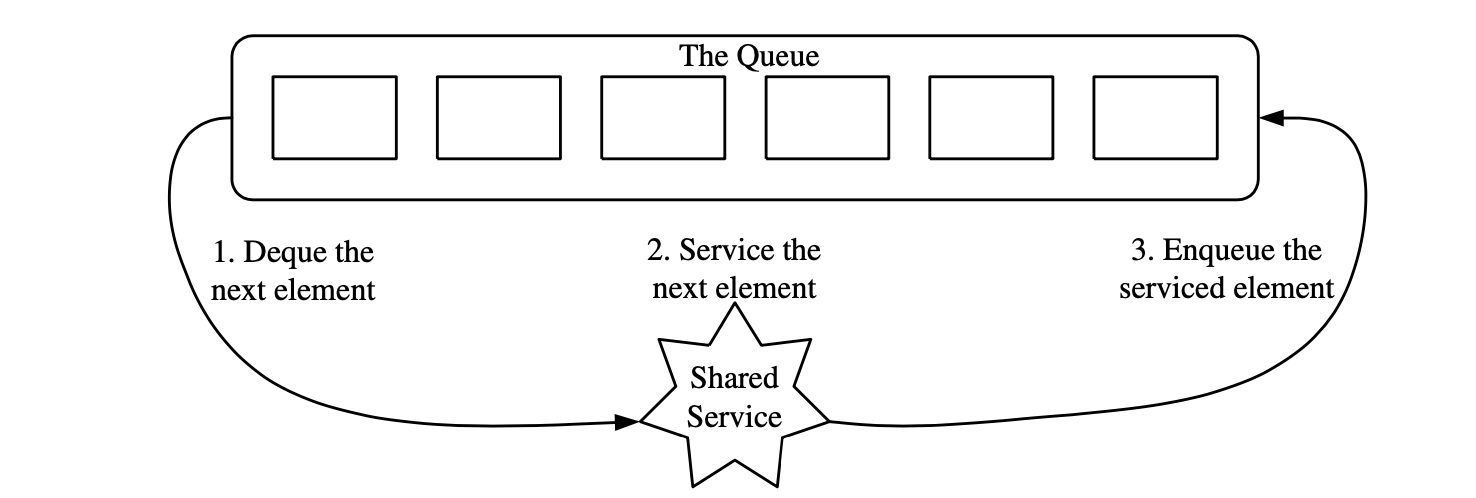

### 2.2 Implementing a Queue with a Circularly Linked List

In [4]:
class CircularQueue:
    '''
    Queue implementation using circularly linked list for storage
    '''
    
    class _Node:
        '''
        Lightweight, nonpublic class for storing a singly linked node
        '''
        __slots__ = '_element','_next'
        
        def __init__(self, e, n):
            self._element = e
            self._next = n
            
    def __init__(self):
        self._size = 0
        # self._tail._next = head, so no need to maintain a head pointer
        self._tail = None
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._tail._next._element
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        oldhead = self._tail._next
        if self._size == 1:
            self._tail = None
        else:
            self._tail._next = oldhead._next
        self._size -= 1
        return oldhead._element
    
    def enqueue(self, e):
        newest = self._Node(e, None)
        if self.is_empty():
            newest._next = newest
        else:
            newest._next = self._tail._next
            self._tail.next = newest
        self._tail = newest
        self._size += 1
        
    def rotate(self):
        if self._size > 0:
            self._tail = self._tail._next
            

## 3. Doubly Linked Lists

Each node keeps an explicit reference to the node before it and after it.
<br><br>
Provides the ability to deleted nodes in arbitrary position.

#### Header and Trailer Sentinels

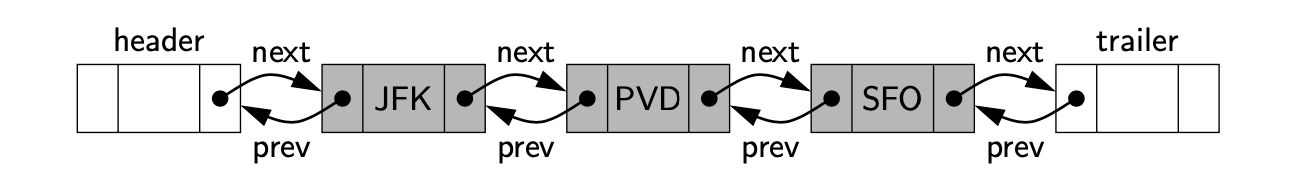

Advantages of using sentinels:

1. Treat all insertions in a unified manner.
    - No need to consider special case: inserting into an empty list
2. Treat all deletions in a unified manner:
    - Deleting the last element
    

### 3.1 Basic Implementation of a Doubly Linked List

In [5]:
class _DoublyLinkedBase:
    '''
    A base class providing a doubly linked list representation
    '''
    
    class _Node:
        __slots__ = '_element','_prev','_next'
        
        def __init__(self, e, p, n):
            self._element = e
            self._prev = p
            self._next = n
            
    def __init__(self):
        self._header = self._Node(None, None, None)
        self._trailer = self._Node(None, None, None)
        self._header._next = self._trailer
        self._trailer._prev = self._header
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def _insert_between(self, e, predecessor, successor):
        '''
        Add element e between existing nodes and return new nodes
        '''
        newest = self._Node(e, predecessor, successor)
        predecessor._next = newest
        successor._prev = newest
        self._size += 1
        return newest
    
    def _delete_node(self, node):
        '''
        Delete nonsentinel node from the list and return its element
        '''
        predecessor = node._prev
        successor = node._next
        predecessor._next = successor
        successor._prev = predecessor
        self._size -= 1
        element = node._element
        # deprecate node
        node._prev = node._next = node._element = None
        return element

### 3.2 Implementing a Deque with a Doubly Linked List

In [6]:
class LinkedDeque(_DoublyLinkedBase):
    '''
    Doubled-ended queue implementation based on a doubly linked list
    '''
    def first(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        return self._header._next._element
    
    def last(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        return self._trailer._prev._element
    
    def insert_first(self, e):
        self._insert_between(e, self._header, self._header._next)
        
    def insert_last(self, e):
        self._insert_between(e, self._trailer._prev, self.trailer)
    
    def delete_first(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        self._delete_node(self._head._next)
        
    def delete_last(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        self._delete_node(self._trailer._prev)

## 4. The Positional List ADT

#### Not using position as a Node's reference

<font color = 'red'> Violate the object-oriented design principles</font>

1. Too much details not been encapulated.
2. Have to allow users to directly accss or manipulate the node

### 4.1 The positional List Abstract Data Type

A position abstract data type:
    - Describe a locatio within a list
    - Act as a marker within the broader positional list
    - Unaffected by changes elsewhere in a list
    - Only invalid if deleted
    
    
A position instance supports only one methods:
    - p.element():
        Return the element stored at position p

The accessor methods supported by a list L:

1. L.first():
    - Return the position of the first element of L
    - or None if L is empty
2. L.last():
    - Return the position of the last element of L
    - or None if L is empty
3. L.before(p):
    - Return the position of L immediately before position p
    - Or None if p is the first position
4. L.after(p):
    - Return the position of L immediately after position p
    - Or None if p is the last position
5. L.is_empty():
    - Return True if list L not contain any element
6. len(L):
    - Return the number of elements in the list
7. iter(L):
    - Return a forward iterator for the elements of the list

The update methods supported by a list L:

1. L.add_first(e):
    - Insert a new element e at the front of L
    - Return the position of the new element
2. L.add_last(e):
    - Insert a new element e at the end of L
    - Return the position of the new element
3. L.add_before(p, e):
    - Insert a new elment e just before position p in L
    - Return the position of the new element
4. L.add_after(p, e):
    - Insert a new element e just after position p in L
    - Return the position of the new element
5. L.replace(p, e):
    - Replace the element at position p with element e
    - Return the element formerly at position p
6. L.delete(p):
    - Remove and return the element at position p in L
    - Invalidating the position

### 4.2 Doubly Linked List Implementation



In [14]:
class PositionalList(_DoublyLinkedBase):
    '''
    A sequential container of elements allowing positional access
    '''
    # -----------------Nested Position class-----------------------------
    class Position:
        '''
        An abstraction representing the location of a single element
        '''
        def __init__(self, container, node):
            self._container = container
            self._node = node
        
        def element(self):
            return self._node._element
        
        def __eq__(self, other):
            '''
            Return True if other is a position representing the same location
            '''
            return type(other) is type(self) and other._node is self._node
        
        def __ne__(self, other):
            '''
            Return True if other does not represent the same location
            '''
            return not(self == other)
        
    # ----------------Utility Method--------------------------------- 
    
    def _validate(self, p):
        '''
        Return position's node or raise appropriate error is invalid
        '''
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._next is None:
            raise ValueError('p is no longer valid')
        return p._node
    
    def _make_position(self, node):
        '''
        Return position instance for given node
        Or None if sentinel
        '''
        if node is self._header or node is self._trailer:
            return None
        return self.Position(self, node)
    
    #---------------------Accessors----------------------------------
    
    def first(self):
        return self._make_position(self._header._next)
    
    def last(self):
        return self._make_position(self._trailer._prev)
    
    def before(self, p):
        node = self._validate(p)
        return self._make_position(node._prev)
    
    def after(self, p):
        node = self._validate(p)
        return self._make_position(node._next)
    
    def __iter__(self):
        # The accessor method return position allow user to navigate the list
        cursor = self.first()
        while cursor is not None:
            yield cursor.element()
            cursor = self.after(cursor)
            
    #-----------------------Mutators----------------------------------
    
    # Override inherited version to return Position, rather than Node
    def _insert_between(self, e, predecessor, successor):
        node = super()._insert_between(e, predecessor, successor)
        return self._make_position(node)
    
    def add_first(self, e):
        return self._insert_between(e, self._header, self._header._next)
    
    def add_last(self, e):
        return self._insert_between(e, self._trailer._prev, self._trailer)
    
    def add_before(self, p, e):
        original = self._validate(p)
        return self._insert_between(e, original._prev, original)
    
    def add_after(self, p, e):
        original = self._validate(p)
        return self._insert_between(e, original, original._next)
    
    def delete(self, p):
        original = self._validate(p)
        return self._delete_node(original)
    
    def replace(self, p, e):
        original = self._validate(p)
        old_value = original._element
        original._element = e
        return old._value

## 5. Sorting a Positional List

Insertion-Sort algorithm

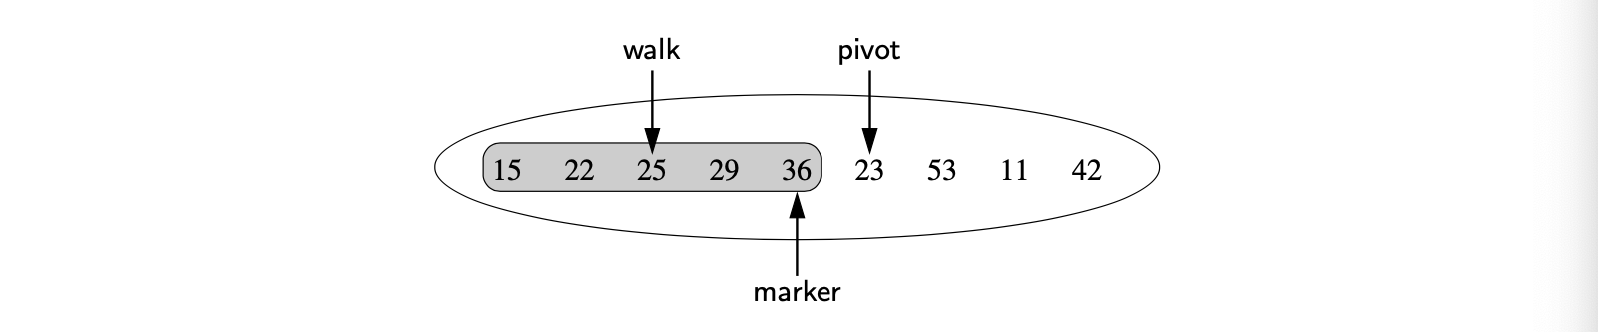

In [15]:
def insertion_sort(L):
    '''
    Sort PositionalList of comparable elements into nondecreasing order
    '''
    if len(L) > 1:
        marker = L.first()
        while marker != L.last():
            pivot = L.after(marker)
            value = pivot.element()
            if value > marker.element():
                marker = pivot
            else:
                walk = marker
                while walk != L.first() and L.before(walk).element() > value:
                    walk = L.before(walk)
                L.delete(pivot)
                L.add_before(walk, value)

In [19]:
L = PositionalList()
a = L.add_first(15)
b = L.add_after(a, 22)
c = L.add_after(b, 25)
d = L.add_after(c, 29)
e = L.add_after(d, 36)
f = L.add_after(e, 23)
g = L.add_after(f, 53)
L.add_after(g, 11)
L.add_last(42)
print([e for e in L])
insertion_sort(L)
print([e for e in L])

[15, 22, 25, 29, 36, 23, 53, 11, 42]
[11, 15, 22, 23, 25, 29, 36, 42, 53]


## 6. Case Study: Maintaining Access Frequencies

Use case:
    - Most accessed URLs
    - Most frequently played music
    
Favorites list ADT:
1. len(L)
2. L.is_empty()
3. access(e):
    - Access the element e, incrementing its access count, and adding it to the favorites list if it is not already present
4. remove(e):
    - Remove element e from the favorites list, if present
5. top(k):
    - Return an iteration of the k most accessed elements

### 6.1 Using a Sorted List

#### Composition Pattern

Define a single object that is composed of two or more other objects.

FavoritesList is composed of:
    - _Item: stores the element and access count as a single instance
    - PositionalList for storage

In [24]:
class FavoritesList:
    '''
    List of elements ordered from most frequently accessed to least
    '''
    #------------------------Nested _Item class------------------------
    class _Item:
        __slots__ = '_value', '_count'
        
        def __init__(self, e):
            self._value = e
            self._count = 0
    
    #------------------------Nonpublic utilities-----------------------
    def _find_position(self, e):
        'Search for element e and return its Position or None if not found'
        walk = self._data.first()
        while walk is not None and walk.element()._value != e:
            walk = self._data.after(walk)
        return walk  
    
    def _move_up(self, p):
        '''
        Move item at Position p earlier in the list based on access count
        '''
        if p != self._data.first():
            cnt = p.element()._count
            walk = self._data.before(p)
            if cnt > walk.element()._count:
                while (walk != self._data.first() 
                       and cnt > self._data.before(walk).element()._count):
                    walk = self._data.before(walk)
                self._data.add_before(walk, self._data.delete(p))
    
    #-----------------------Public Methods-----------------------------
           
    def __init__(self):
        # will be list of _Item instances
        self._data = PositionalList()
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data) == 0
    
    def access(self, e):
        p = self._find_position(e)
        if p is None:
            p = self._data.add_last(self._Item(e))
        p.element()._count += 1
        self._move_up(p)
        
    def remove(self, e):
        p = self._find_position(e)
        if p is not None:
            self._data.delete(p)
    
    def top(self, k):
        if not 1 <= k <= len(self):
            raise ValueError('Illegal value for k')
        walk = self._data.first()
        for j in range(k):
            item = walk.element()
            yield item._value
            walk = self._data.after(walk)

### 6.2 Using a List with the Move-to-Front Heuristic

Locality of reference:
    - Once an element is accessed it is more likely to be accessed again in the near future.
    
Move-to-Front heuristic:
    - Each time access an element, move it to the front of the list

In [27]:
class FavoritesListMTF(FavoritesList):
    
    # override _move_up to provide move-to-front heuristic
    def _move_up(self, p):
        if p != self._data.first():
            self._data.add_first(self._data.delete(p))
    
    # override top because list is no longer sorted
    def top(self, k):
        if not 1 <= k <= len(self):
            raise ValueError('Illegal value for k')
        
        # make a copy of the original list
        temp = PositionalList()
        for item in self._data:
            temp.add_last(item)
            
        # repeatedly find, report and remove element with largest count
        for j in range(k):
            highPos = temp.first()
            walk = temp.after(highPos)
            while walk is not None:
                if walk.element()._count > highPos.element()._count:
                    highPos = walk
                walk = temp.after(walk)
            yield highPos.element()._value
            temp.delete(highPos)

## 7. Link-Based vs. Array-Based Sequences

### Advantages of Array-Based Sequences

1. Provides O(1) time access to an element based on an integer index.
    - Linked List: O(k) to traverse 
2. Operations with equivalent asymptotic bounds typically run a constant factor more efficiently than a linked structure.
    - Usually no instantiation of a node and appropriate linking of nodes
3. Array-based representations typically use proportionally less memory than linked structure.
    - Array worst-case: dynamic array allocated memory for 2n
    - Singly linked list: 2n references(element and next)
    - Doubly linked list: 3n references
    
### Advantages of Link-Based Sequences

1. Linked structure provide worst-case time bounds for their operations
    - Linked: good in real-time system to provide immediate responses
    - Amortized bounds of Array with the expansion or contraction of a dynamic array: good in bunch computation
2. Linked structure support O(1) insertions and deletions at arbitrary position.